# **Walmart store salesforecasting**

**Dataset description:**

In this dataset, we have weekly sales data for 45 stores for a period of 3 years. In addition, we had store and geography specific information such as store size, unemployment rate, temperature etc

**stores.csv**

This file contains information about the 45 stores, indicating its type and size of store.(type defines whether the store is of type A,B,C and size defines no.of products in the store)

**features.csv**

This file contains additional data related to the store and regional activity for the given dates. It contains the following fields:

Store - the store number

Date - the week

Temperature - average temperature in the region

Fuel_Price - cost of fuel in the region

CPI - the consumer price index

Unemployment - the unemployment rate

IsHoliday - whether the week is a special holiday week


# New Section

**Data extraction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
features=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features.csv")
store=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stores.csv")
train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


**Data Preprocessing**

Taking important information and merging the data

In [ ]:
train=train.groupby(['Store','Date'])['Weekly_Sales'].sum()
train=train.reset_index()
train.head(10)

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
5,1,2010-03-12,1439541.59
6,1,2010-03-19,1472515.79
7,1,2010-03-26,1404429.92
8,1,2010-04-02,1594968.28
9,1,2010-04-09,1545418.53


In [ ]:
data=pd.merge(train,features,on=['Store','Date'],how='inner')
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,1439541.59,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,1472515.79,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,1404429.92,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,1594968.28,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,1545418.53,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [ ]:
data=pd.merge(data,store,on=['Store'],how='inner')
data.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


Sorting based on date

In [ ]:
data=data.sort_values(by='Date')
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1287,10,2010-02-05,2193048.75,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,False,B,126512
5148,37,2010-02-05,536006.73,45.97,2.572,NaN,NaN,NaN,NaN,NaN,209.852966,8.554,False,C,39910
2288,17,2010-02-05,789036.02,23.11,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,6.548,False,B,93188
4147,30,2010-02-05,465108.52,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False,C,42988
3432,25,2010-02-05,677231.63,21.10,2.784,NaN,NaN,NaN,NaN,NaN,204.247194,8.187,False,B,128107
3003,22,2010-02-05,1033017.37,24.36,2.788,NaN,NaN,NaN,NaN,NaN,135.352461,8.283,False,B,119557
3146,23,2010-02-05,1364721.58,15.25,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,5.892,False,B,114533
3289,24,2010-02-05,1388725.63,22.43,2.954,NaN,NaN,NaN,NaN,NaN,131.527903,8.326,False,A,203819
2574,19,2010-02-05,1507637.17,20.96,2.954,NaN,NaN,NaN,NaN,NaN,131.527903,8.350,False,A,203819


Removing unwanted features from the dataframe

In [ ]:
data=data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988
3432,25,2010-02-05,677231.63,21.10,2.784,204.247194,8.187,False,B,128107
3003,22,2010-02-05,1033017.37,24.36,2.788,135.352461,8.283,False,B,119557
3146,23,2010-02-05,1364721.58,15.25,2.788,131.527903,5.892,False,B,114533
3289,24,2010-02-05,1388725.63,22.43,2.954,131.527903,8.326,False,A,203819
2574,19,2010-02-05,1507637.17,20.96,2.954,131.527903,8.350,False,A,203819


In [ ]:
data.shape

(6435, 10)

**Checking for null values and verify that data is clean.**

In [ ]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

**Converting IsHoliday (which is string) into Holiday (which is integer) 1 for holiday and 0 otherwise.**

In [ ]:
data['Holiday']=[int(i) for i in list(data.IsHoliday)]
data.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910,0
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988,0


**Splitting store type into categorical features.**

As we have 3 types of stores (A,B and C) which are categorical. Therefore splitting each type as a feature into one-hot encoding

(we know of both columns B and C are 0 then it is A-type. So B=1 and C=0 for B.B=0 and C=1 for C.B=0 and C=0 for A)

In [ ]:
Type_dummy=pd.get_dummies(data['Type'],drop_first=True)
Type_dummy.head(10)

,B,C
0,0,0
1287,1,0
5148,0,1
2288,1,0
4147,0,1
3432,1,0
3003,1,0
3146,1,0
3289,0,0
2574,0,0


In [ ]:
data=pd.concat([data,Type_dummy],axis=1)
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday,B,C
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315,0,0,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512,0,1,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910,0,0,1
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188,0,1,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988,0,0,1
3432,25,2010-02-05,677231.63,21.10,2.784,204.247194,8.187,False,B,128107,0,1,0
3003,22,2010-02-05,1033017.37,24.36,2.788,135.352461,8.283,False,B,119557,0,1,0
3146,23,2010-02-05,1364721.58,15.25,2.788,131.527903,5.892,False,B,114533,0,1,0
3289,24,2010-02-05,1388725.63,22.43,2.954,131.527903,8.326,False,A,203819,0,0,0
2574,19,2010-02-05,1507637.17,20.96,2.954,131.527903,8.350,False,A,203819,0,0,0



**Manipulating data.**

 Transform data into useful information and deleting unnecessary items. Getting the final data.

In [ ]:
data=data.drop(['Type','IsHoliday'],axis=1)
data.drop(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Holiday,B,C
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,151315,0,0,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,126512,0,1,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,39910,0,0,1
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,93188,0,1,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,42988,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940.94,56.69,3.882,216.151590,7.293,128107,0,1,0
714,5,2012-10-26,319550.77,71.70,3.506,224.037814,5.422,34875,0,1,0
5719,40,2012-10-26,921264.52,49.65,3.917,138.728161,4.145,155083,0,0,0
2573,18,2012-10-26,1127516.25,56.09,3.917,138.728161,8.243,120653,0,1,0


**Splitting data into train and test data. The size of the test data is 20%.**

In [ ]:
X=data.drop(['Weekly_Sales','Store','Date'],axis=1)
y=data['Weekly_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X.head()

,Temperature,Fuel_Price,CPI,Unemployment,Size,Holiday,B,C
0,42.31,2.572,211.096358,8.106,151315,0,0,0
1287,54.34,2.962,126.442065,9.765,126512,0,1,0
5148,45.97,2.572,209.852966,8.554,39910,0,0,1
2288,23.11,2.666,126.442065,6.548,93188,0,1,0
4147,39.05,2.572,210.752605,8.324,42988,0,0,1


**Applying linear regression and fit the training data into it.**

In [ ]:
LR=LinearRegression(normalize=True)
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

**Predicting the data for test value as per linear regression.**

In [ ]:
y_pred=LR.predict(X_test)
y_pred

array([1496928.08645542,  816425.31648401,  476178.08849769, ...,
        224056.69571867,  554520.48762503, 1214821.78304796])

**Data visualization**

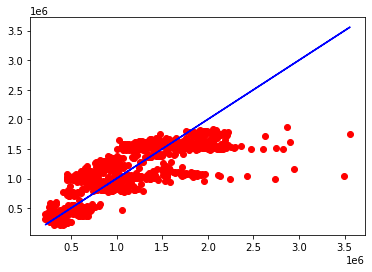

In [ ]:
y_pred=LR.predict(X_test)
plt.plot(y_test,y_pred,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()

**Evaluating the model by calculating errors by the root mean square error and R - squared.**

In [ ]:
Root_mean_square_error=np.sqrt(np.mean(np.square(y_test-y_pred)))
print(Root_mean_square_error)

321378.57105640316


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)


0.6696084685273729


In [ ]:
acc_lr= round(LR.score(X_train,y_train) * 100, 2)
print ("Accuracy:",acc_lr)

Accuracy: 67.41


To predict the weekly sales,we give particular tuple to input in the model and predict the weekly sales as output
Final prediction

In [ ]:
prediction=LR.predict(pd.DataFrame([(40.37,2.876,173.325456,7.934,103464,0,0,0)]))
print(prediction)

[772986.31311955]
